## PA 5
### Chen Anhua

### Q1
#### (a)

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import LeaveOneOut, KFold
from pylab import rcParams
import statsmodels.api as sm
from scipy.interpolate import make_lsq_spline, BSpline
from scipy.interpolate import LSQUnivariateSpline

import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
strongdrink  = pd.read_csv("strongdrink.txt")

In [3]:
strongdrink.shape

(176, 14)

In [4]:
y = strongdrink["cultivar"]
X = strongdrink.loc[:, ["alco", "malic", "tot_phen", "color_int"]]
#X["const"] = 1

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.25,
    random_state=20)
#reg = sm.Logit(endog= y_train, exog= X_train, missing='drop')
#print(summary(reg))
logistic = LogisticRegression(multi_class = "multinomial", solver="lbfgs")
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
#print("Intercept is : {}".format(logistic.intercept_[0]))
print("Coefficients of j = 1 are: {}".format(logistic.coef_[0]))
print("Intercept of j = 1 is: {}".format(logistic.intercept_[0]))
print("Coefficients of j = 2 are: {}".format(logistic.coef_[1]))
print("Intercept of j = 2 is: {}".format(logistic.intercept_[1]))

print(classification_report(y_test, y_pred))

Coefficients of j = 1 are: [ 1.70173443 -0.26578756  1.22410094  0.02250699]
Intercept of j = 1 is: -24.02761652694668
Coefficients of j = 2 are: [-1.46629729 -0.33295144  0.66355615 -0.92268168]
Intercept of j = 2 is: 22.78073250150875
             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44



The error rate for class 1 is 0.13, and 0 for both class 2 and 3. The prdiction precision for class 2 and 3 are the best, with a slightly better recall rate in class 3. Therefore, the most accurately-predicted class is not the one with the most number of observations.

### (b)

In [5]:

from sklearn.metrics import precision_recall_fscore_support as score
Xvars = X.values
yvals = y
N_loo = X.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)

y_tests = np.zeros(N_loo)
y_preds = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    
    y_tests[test_index] = y_test
    y_preds[test_index] = y_pred
    MSE_vec[test_index] = (y_test - y_pred) ** 2

MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print('Estimate MSE loocv=', MSE_loo,
      'Estimate MSE standard err=', MSE_loo_std)

print(classification_report(y_tests, y_preds))

Estimate MSE loocv= 0.0965909090909 Estimate MSE standard err= 0.394262505894
             precision    recall  f1-score   support

        1.0       0.90      0.93      0.92        59
        2.0       0.91      0.90      0.91        71
        3.0       0.96      0.93      0.95        46

avg / total       0.92      0.92      0.92       176



Error rates are 0.1, 0.09 and 0.04 for three classes respectively. Overall error rate is 0.92, when compared to (a), the result is better for class 1 while worse for class 2 and 3

#### (c)

In [6]:
k = 4
kf = KFold(n_splits=k, random_state=10, shuffle=True)
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)
y_tests = np.array([])
y_preds = np.array([])

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_tests = np.append(y_tests, y_test)
    y_preds = np.append(y_preds, y_pred)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('Estimate MSE k-fold=', MSE_kf,
      'Estimate MSE standard err=', MSE_kf_std)

print(classification_report(y_tests, y_preds))

Estimate MSE k-fold= 0.107954545455 Estimate MSE standard err= 0.0742994138104
             precision    recall  f1-score   support

        1.0       0.87      0.93      0.90        59
        2.0       0.91      0.87      0.89        71
        3.0       0.96      0.93      0.95        46

avg / total       0.91      0.91      0.91       176



Error rates are 0.13, 0.09 and 0.04 for three classes resepectively. When compared with (a), worse precision for class 2 and 3. When compared to (b), worse precision for class 1.

### Q2
#### (a)

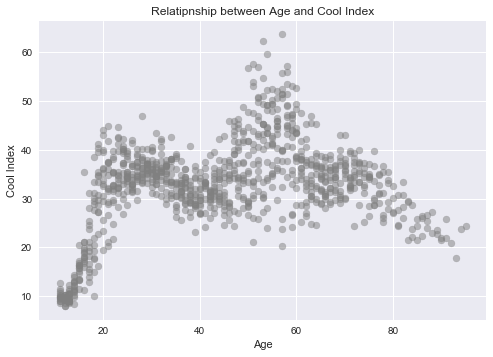

In [7]:
df = pd.read_csv('./CoolIndex.txt', header = None, names = ['age', "CI"])
x = np.array(df['age'])
y = np.array(df['CI'])

plt.scatter(x, y, c = "gray", alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Cool Index")
plt.title("Relatipnship between Age and Cool Index")
plt.show()


In [8]:
import statsmodels.api as sm
CI = df['CI']
age = df['age']
age_bin1 = ((age >= 11) & (age < 22)).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age <= 95)).astype(int)

X_step = pd.DataFrame(dict(age_bin1 = age_bin1, age_bin2 = age_bin2,
                           age_bin3 = age_bin3, age_bin4 = age_bin4,
                           age_bin5 = age_bin5))
X_step.describe()

reg2 = sm.OLS(endog = CI, exog = X_step, missing='drop')
reg2_results = reg2.fit()

#### (b)

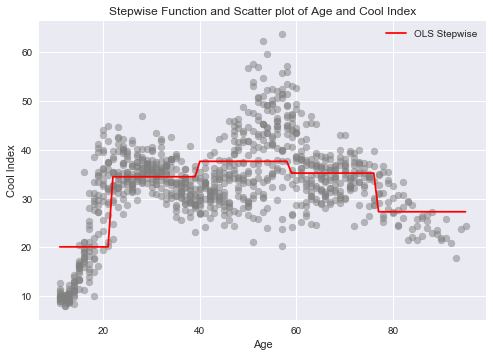

In [9]:
df.CI_stepwise = 0    # create dummy variable
df.loc[(df.age.astype(int) >= 11) & (df.age.astype(int) < 22), 'CI_stepwise'] = reg2_results.params[0]
df.loc[(df.age.astype(int) >= 22) & (df.age.astype(int) < 40), 'CI_stepwise'] = reg2_results.params[1]
df.loc[(df.age.astype(int) >= 40) & (df.age.astype(int) < 59), 'CI_stepwise'] = reg2_results.params[2]
df.loc[(df.age.astype(int) >= 59) & (df.age.astype(int) < 77), 'CI_stepwise'] = reg2_results.params[3]
df.loc[(df.age.astype(int) >= 77) & (df.age.astype(int) <=95), 'CI_stepwise'] = reg2_results.params[4]
plt.scatter(x, y, c = "gray", alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Cool Index")
plt.title("Stepwise Function and Scatter plot of Age and Cool Index")
plt.plot(df['age'], df['CI_stepwise'], c = 'r', label = 'OLS Stepwise')
plt.legend()
plt.show()

In [10]:
print(reg2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                     CI   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 19 Feb 2018   Prob (F-statistic):          3.73e-114
Time:                        11:08:41   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1025      0.562     35.746      0.0

The estimated step function values for each bin are: 20.1025, 34.4758, 37.6351, 35.2254, 27.2964

#### (c)

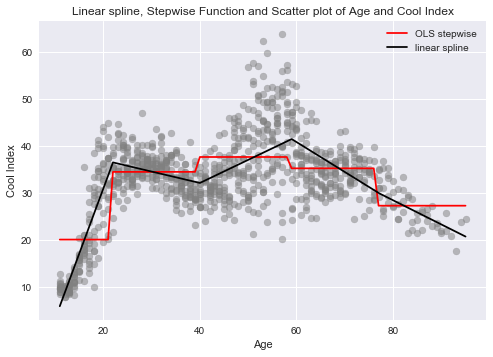

In [11]:
knots = [22, 40, 59, 77]
k = 1

spl_df = LSQUnivariateSpline(age.values, CI.values, knots, k=1)

age_vec = np.linspace(age.values.min(), age.values.max(), 1000)

plt.scatter(x, y, c = "gray", alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Cool Index")
plt.title("Linear spline, Stepwise Function and Scatter plot of Age and Cool Index")
plt.plot(df['age'], df['CI_stepwise'], c = 'r', label = 'OLS stepwise')
plt.plot(age_vec, spl_df(age_vec), c = 'k', label = 'linear spline')
plt.legend()
plt.show()

In [12]:
print("Predicted coolness of a 73-year old is:", spl_df(73))

Predicted coolness of a 73-year old is: 32.536832389143306


#### (d)

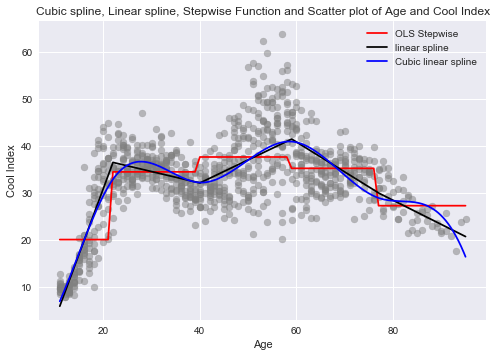

In [13]:
knots = [22, 40, 59, 77]
k = 1

cub_spl_df = LSQUnivariateSpline(age.values, CI.values, knots, k = 3)

age_vec = np.linspace(age.values.min(), age.values.max(), 1000)

plt.scatter(x, y, c="gray", alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Cool Index")
plt.title("Cubic spline, Linear spline, Stepwise Function and Scatter plot of Age and Cool Index")
plt.plot(df['age'], df['CI_stepwise'], c = 'r', label = 'OLS stepwise')
plt.plot(age_vec, spl_df(age_vec), c = 'k', label = 'linear spline')
plt.plot(age_vec, cub_spl_df(age_vec), c = 'b', label = 'Cubic linear spline')
plt.legend()
plt.show()

In [14]:
print("The predicted coolness of a 73-year old is:", cub_spl_df(73))

The predicted coolness of a 73-year old is: 31.262429389257864
